# Rotation of a slice in the Fourier domain

Here we show more clearly what may seem confusing in ```Fourier_point_source.ipynb```. Note that we are interested in the rotation of the coordinates and the approximate locations of the initial points on the rotated grid, so we use the ```tab10``` color map to be able to track each point, and this is useful only with nearest neighbour interpolation. This doesn't tell us much when doing linear interpolation (since there is no link between the colours and the intermediate values).

In [1]:
%load_ext autoreload
%autoreload 2
import site
import sys
site.addsitedir('..')

In [3]:
import numpy as np
import jax.numpy as jnp
from  matplotlib import pyplot as plt
from src.utils import *
from src.projection import project, rotate_z0
from src.interpolate import *

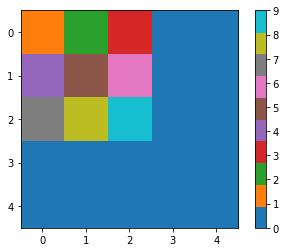

In [4]:
nx = 5
dx = 0.2

v = np.zeros([nx,nx,nx])
v[0:3,0:3,2] =  np.arange(1,10).reshape(3,3)

plt.imshow(v[:,:,2]); plt.colorbar()

plt.set_cmap('tab10')

In [5]:
x_freq = jnp.fft.fftfreq(nx, dx)
y_freq = jnp.fft.fftfreq(nx, dx)
z_freq = jnp.fft.fftfreq(nx, dx)

x_grid = jnp.array([x_freq[1], len(x_freq)])
y_grid = jnp.array([y_freq[1], len(y_freq)])
z_grid = jnp.array([z_freq[1], len(z_freq)])

In [7]:
angles = jnp.array([0,0,jnp.pi/4])
slice_coords = rotate_z0(x_grid, angles)

In [8]:
Xr = slice_coords[0,:].reshape(nx,nx)
Yr = slice_coords[1,:].reshape(nx,nx)

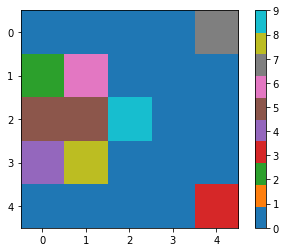

In [9]:
slice_interp = interpolate(slice_coords, x_grid, jnp.fft.ifftshift(v), "nn")
slice_interp_2d = (jnp.fft.fftshift(slice_interp.reshape(v.shape[0], v.shape[1])))
plt.imshow(slice_interp_2d); plt.colorbar()